In [947]:
import  pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt




In [948]:
df = pd.read_csv('Country Data EDA.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [949]:
df.isnull().sum() 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [950]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [951]:
df.drop(columns=['country'], inplace=True)

Column child_mort had 2 outliers removed


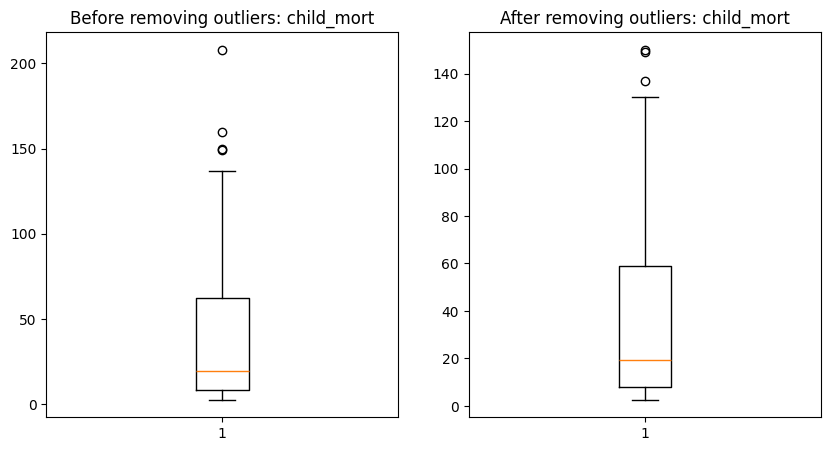

Column exports had 3 outliers removed


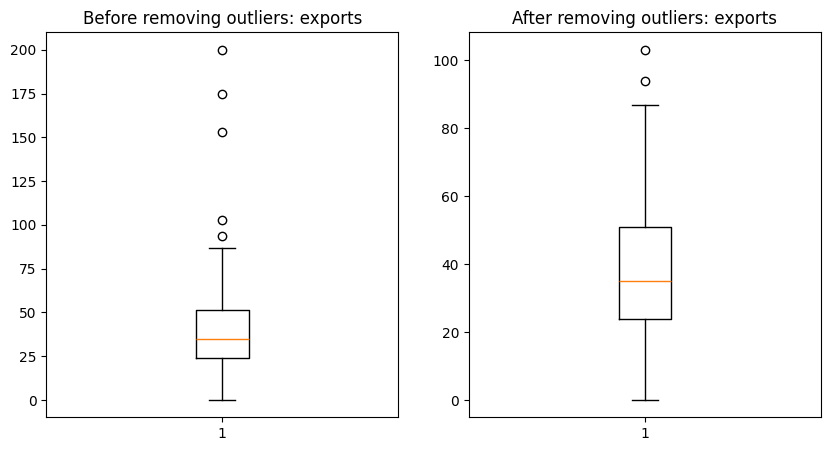

Column health had 1 outliers removed


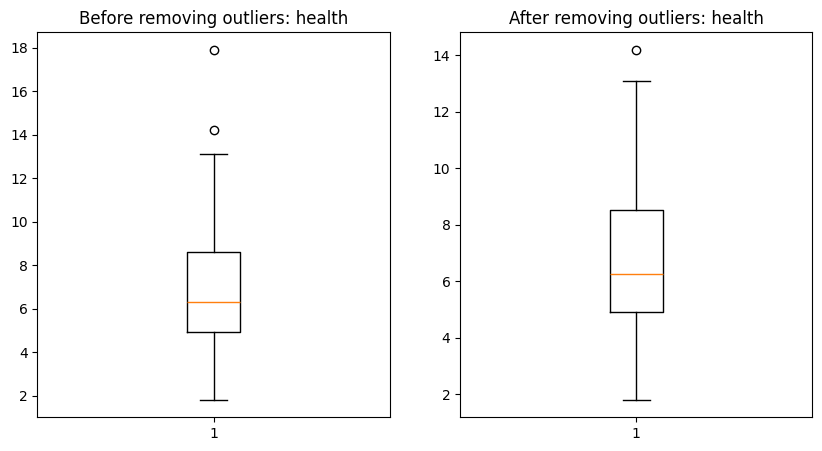

Column imports had 3 outliers removed


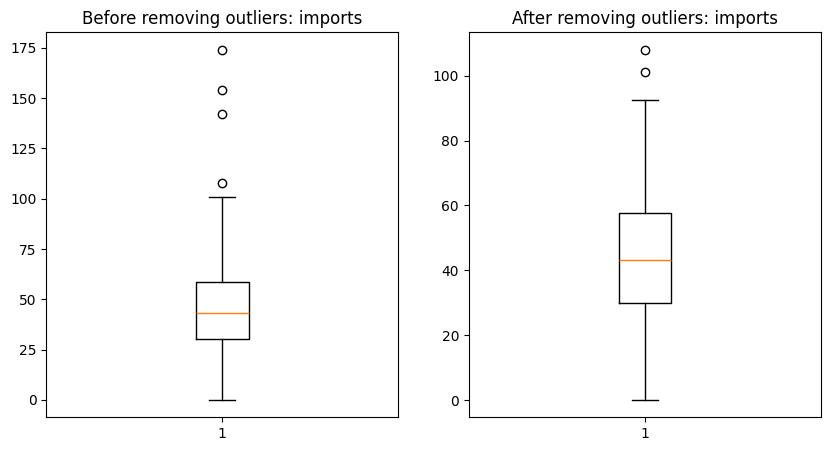

Column income had 4 outliers removed


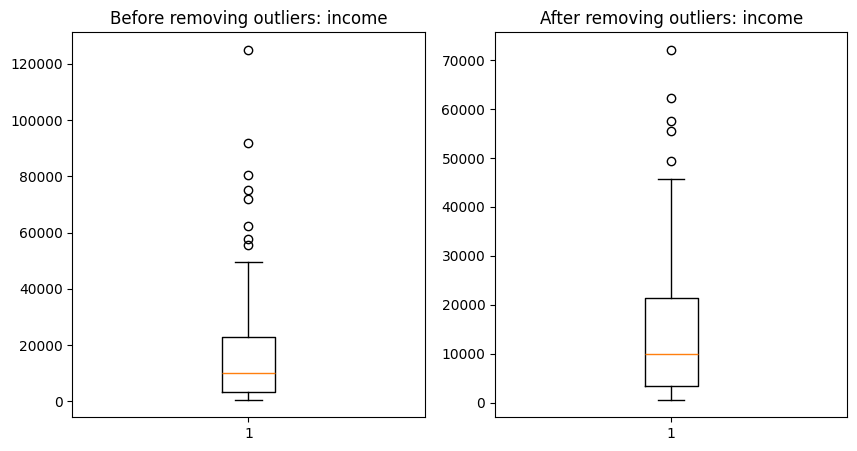

Column inflation had 2 outliers removed


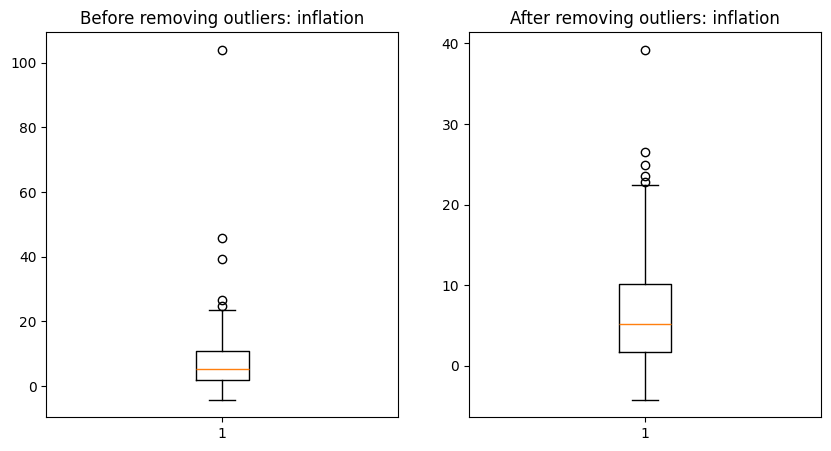

Column life_expec had 1 outliers removed


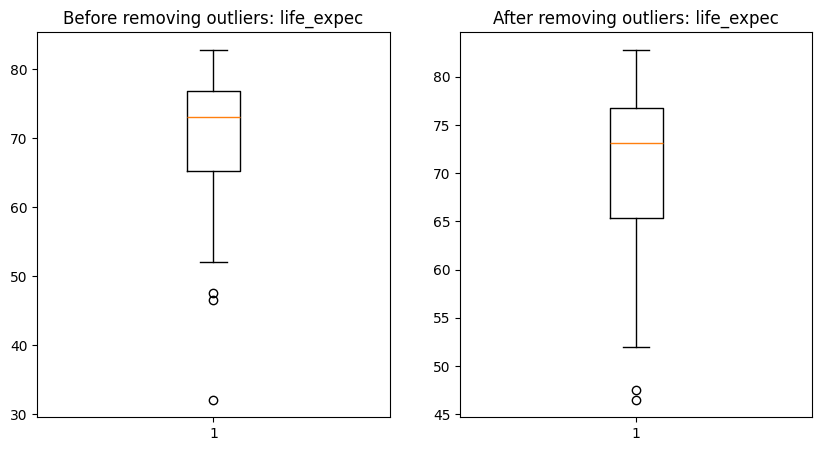

Column total_fer had 1 outliers removed


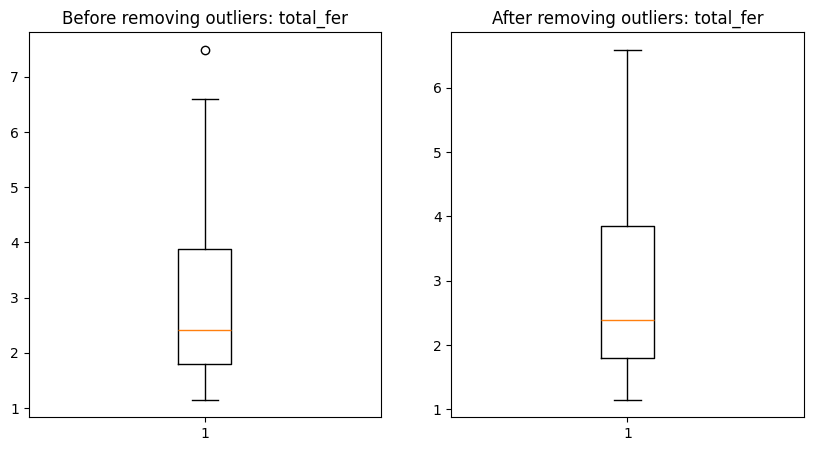

Column gdpp had 4 outliers removed


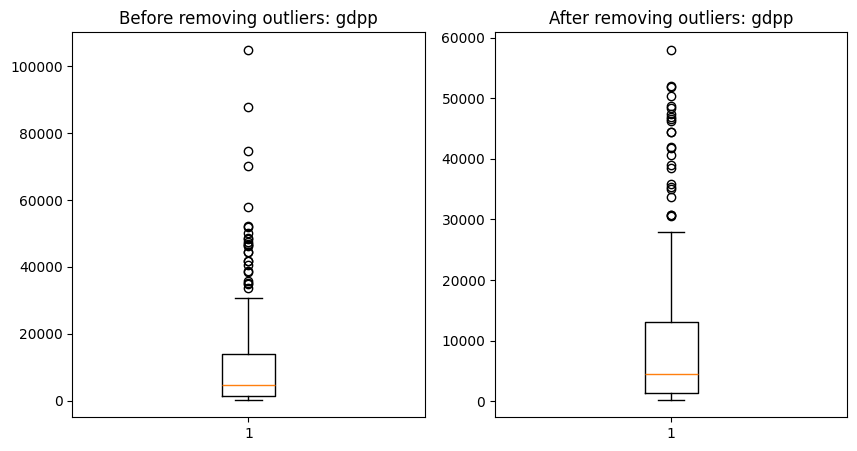

In [952]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and df_outliers_removed is your DataFrame with outliers removed
for column in df.columns:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Before removing outliers
    axs[0].boxplot(df[column])
    axs[0].set_title(f'Before removing outliers: {column}')

    # Calculate z-scores
    z_scores = stats.zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    print(f'Column {column} had {len(df) - sum(filtered_entries)} outliers removed')
    # After removing outliers
    df_outliers_removed = df[filtered_entries]
    axs[1].boxplot(df_outliers_removed[column])
    axs[1].set_title(f'After removing outliers: {column}')

    plt.show()

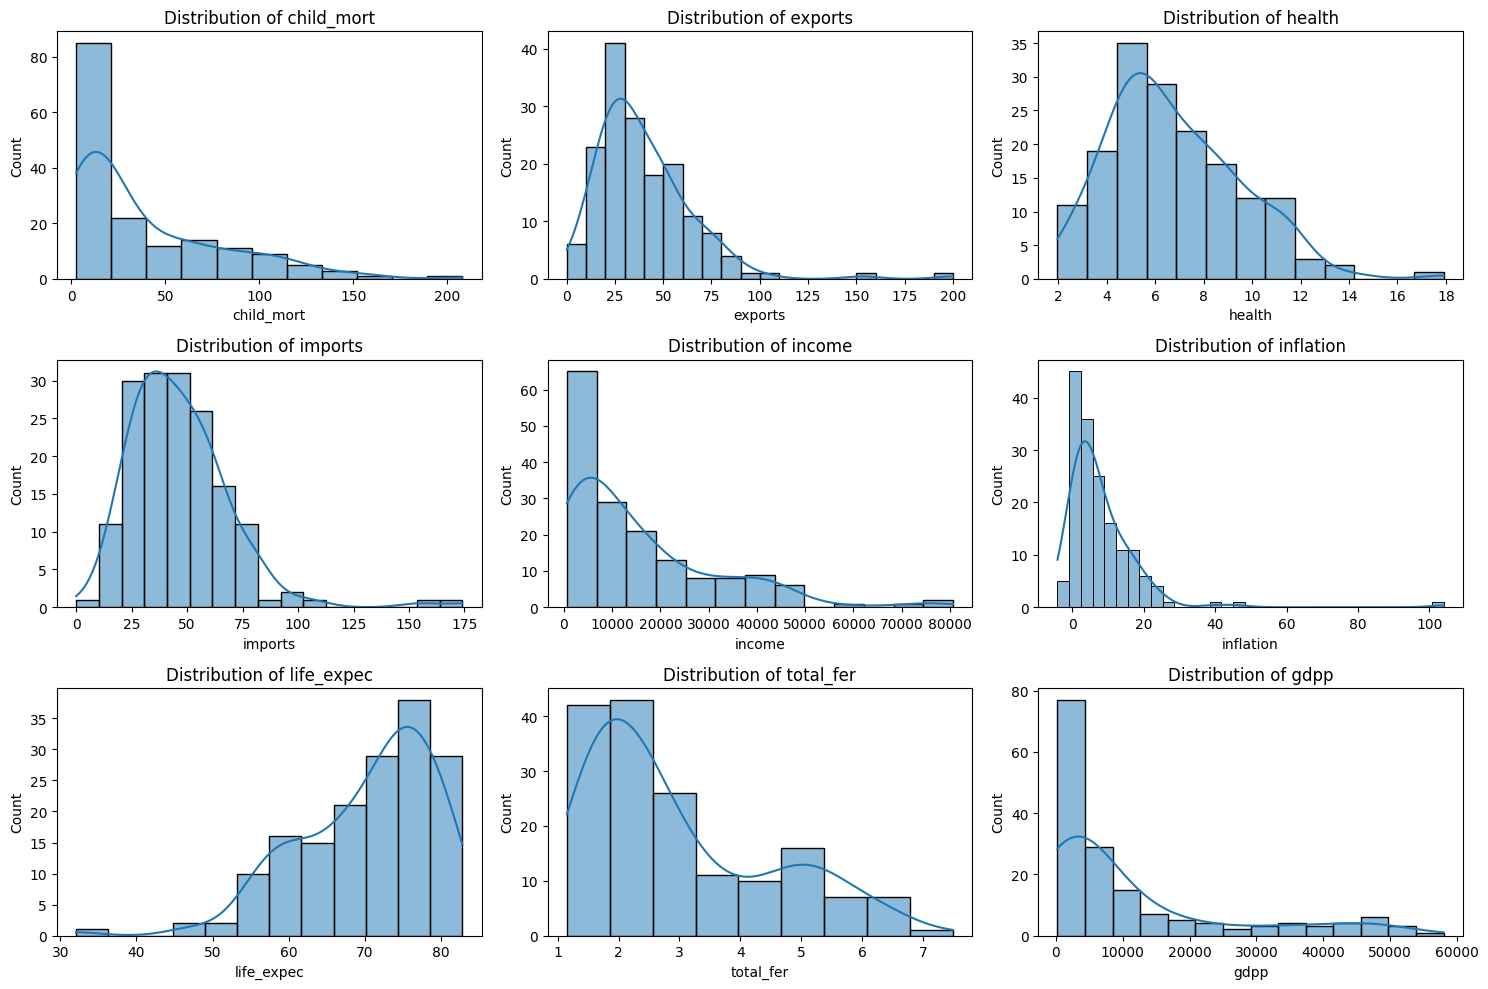

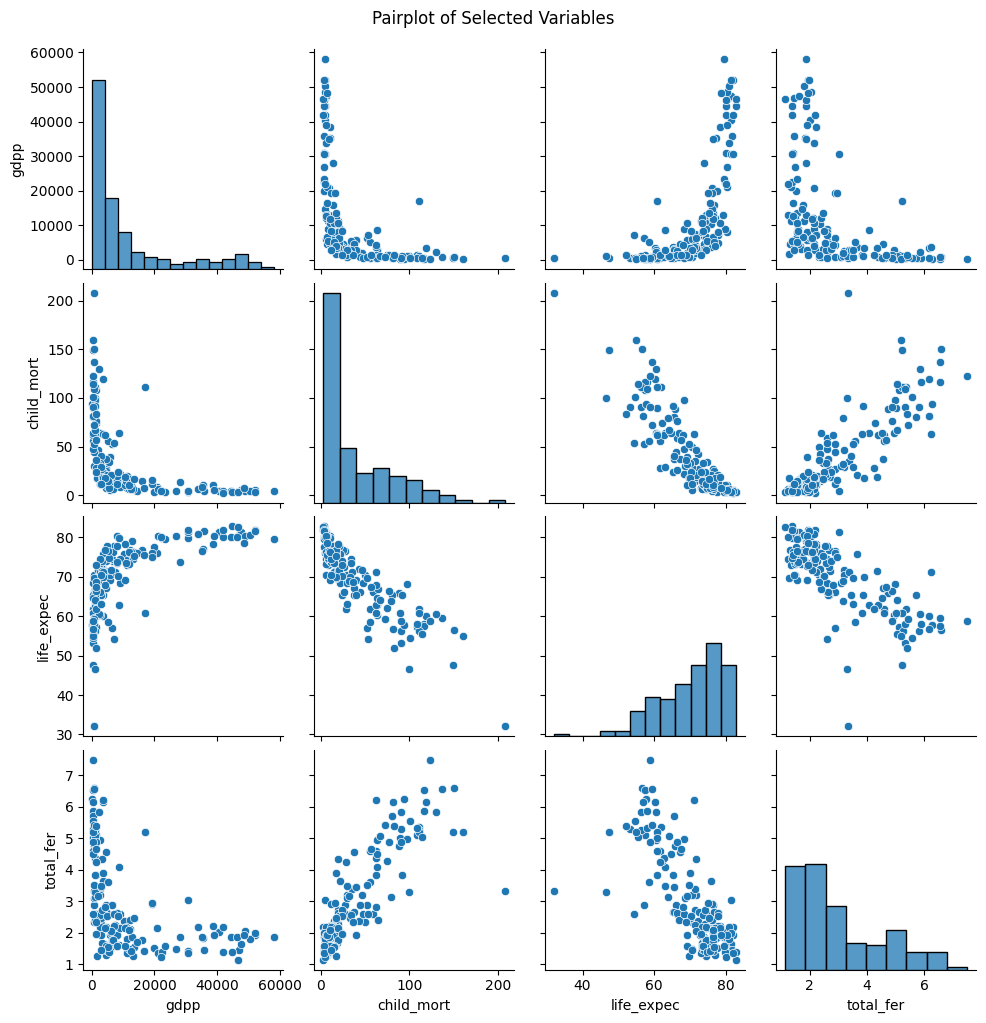

In [953]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms for all numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_outliers_removed, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_outliers_removed[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

# Now, we will create a pair plot for the variables 'gdpp', 'child_mort', 'life_expec', 'total_fer'
sns.pairplot(df_outliers_removed[['gdpp', 'child_mort', 'life_expec', 'total_fer']])
plt.suptitle("Pairplot of Selected Variables", y=1.02)  # Adjust the title position

plt.show()


In [954]:
df_outliers_removed

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


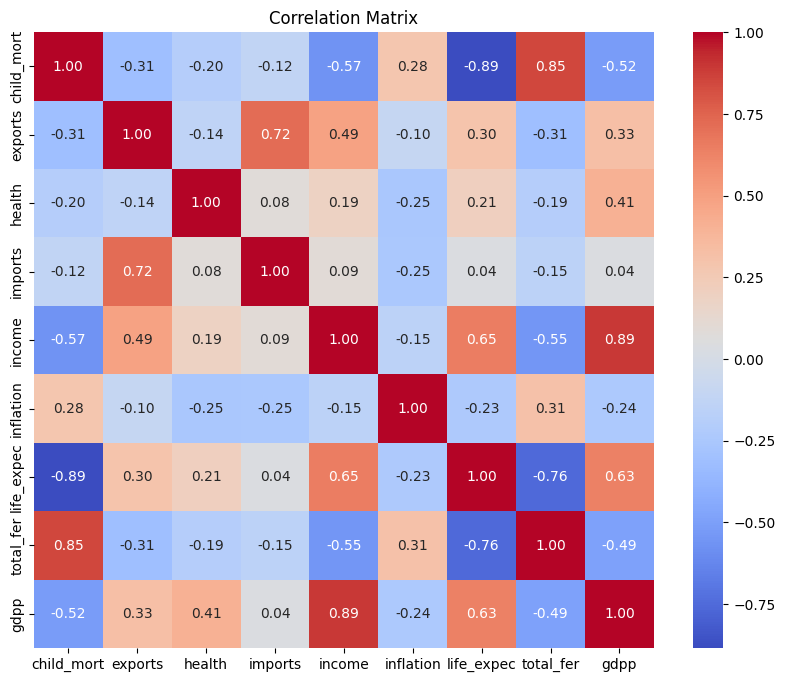

In [955]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_outliers_removed.corr()

# Assuming correlation is your correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [956]:
#normalizing the features of the dataframe 
from sklearn.preprocessing import StandardScaler
normalized_features = StandardScaler().fit_transform(df_outliers_removed)
df_outliers_removed = pd.DataFrame(normalized_features, columns=df.columns)

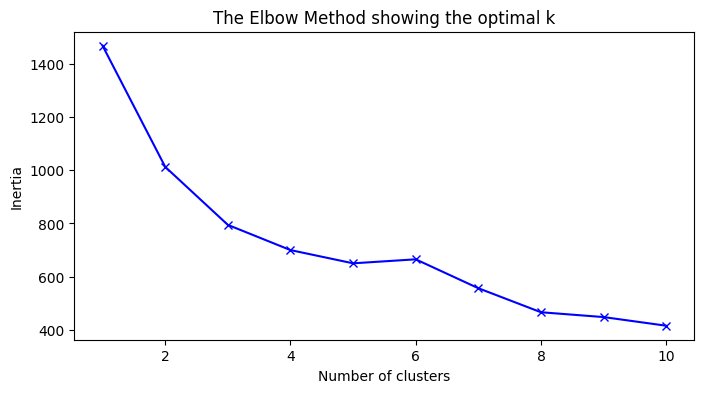

In [957]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate distortions for a range of number of clusters
distortions = []
K = range(1, 11)  # Typically, we check the elbow for 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_outliers_removed)
    distortions.append(kmeans.inertia_)

# Plotting the distortions to find the elbow
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


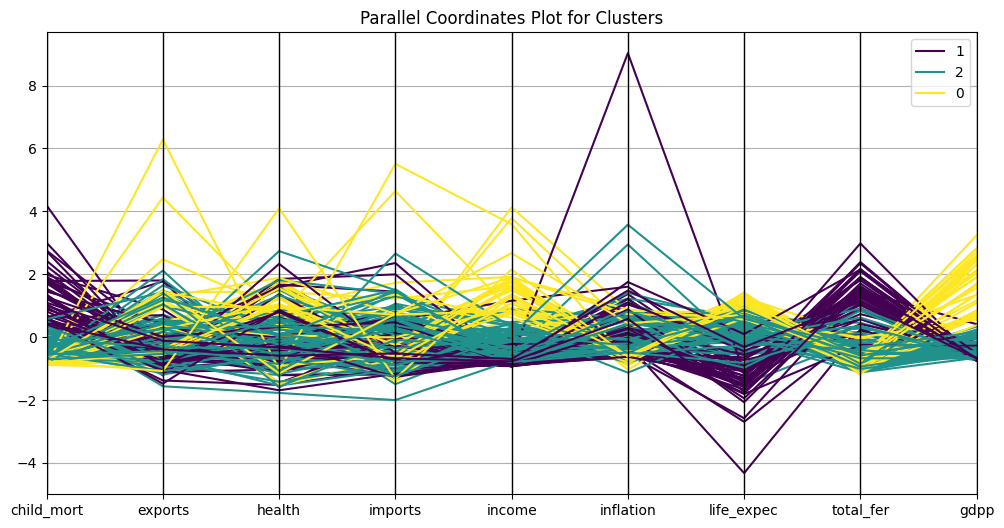

In [958]:
import pandas as pd
from pandas.plotting import parallel_coordinates

# Assuming k_opt is the optimal number of clusters you decide based on the elbow plot
k_opt = 3
kmeans_opt = KMeans(n_clusters=k_opt, random_state=0)
clusters = kmeans_opt.fit_predict(df_outliers_removed)

# Add the cluster labels to the dataframe
df_outliers_removed['Cluster'] = clusters

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df_outliers_removed, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot for Clusters')
plt.show()


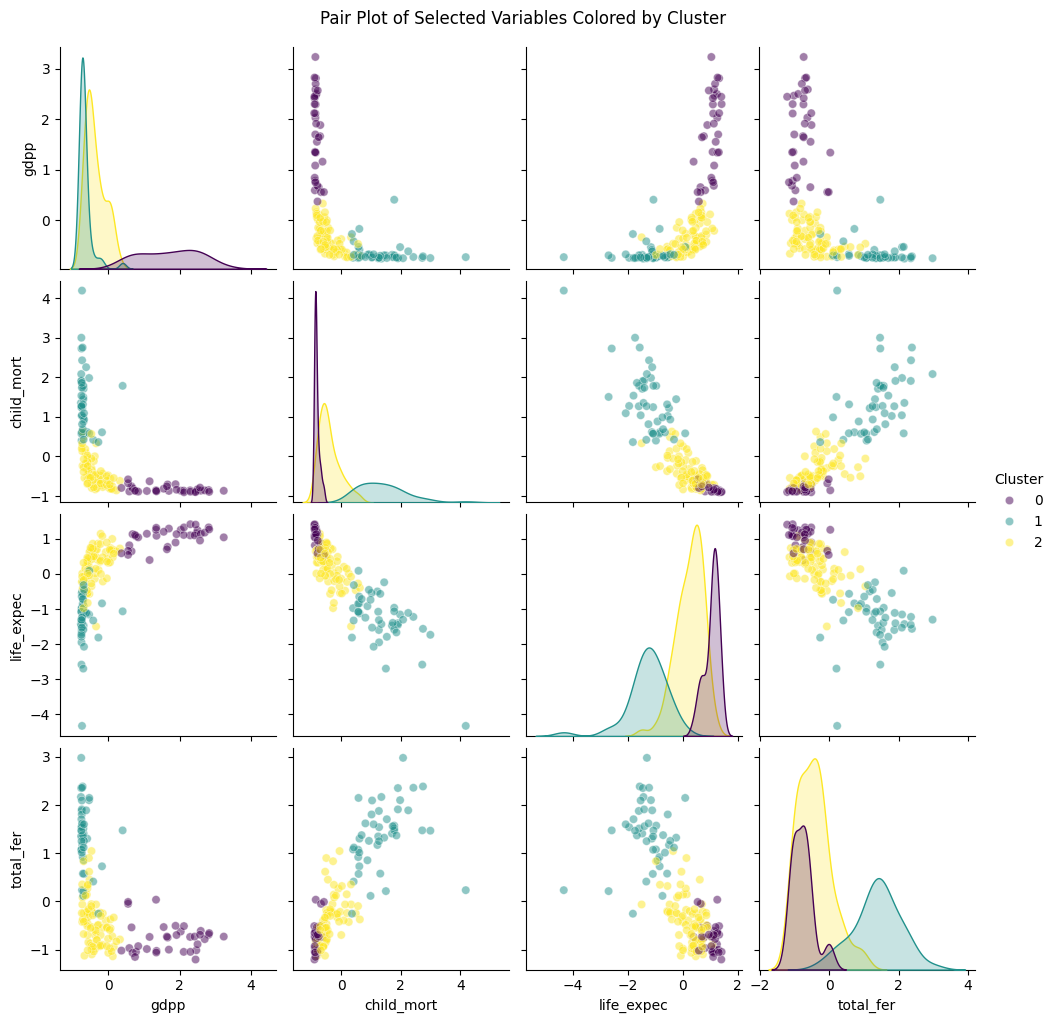

In [959]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already determined the optimal number of clusters
k_opt = 3# Replace this with the number of clusters you found optimal
kmeans_opt = KMeans(n_clusters=k_opt, random_state=0)
clusters = kmeans_opt.fit_predict(df_outliers_removed.drop('Cluster', axis=1))  # Ensure no 'Cluster' column before fit

# Add the cluster labels to the dataframe
df_outliers_removed['Cluster'] = clusters

# Select specific columns for the pair plot
selected_columns = df_outliers_removed[['gdpp', 'child_mort', 'life_expec', 'total_fer', 'Cluster']]

# Create a pair plot colored by cluster membership
pairplot = sns.pairplot(selected_columns, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.5})
pairplot.fig.suptitle('Pair Plot of Selected Variables Colored by Cluster', y=1.02)  # Adjust the title position
plt.show()


In [960]:
df_outliers_removed

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,1.266659,-1.179421,0.289459,-0.070077,-0.881403,0.147551,-1.598714,1.875433,-0.736757,1
1,-0.557354,-0.472376,-0.090563,0.089790,-0.353953,-0.317456,0.680403,-0.874719,-0.492243,2
2,-0.292179,-0.063860,-0.968673,-0.653372,-0.165669,0.773197,0.703081,-0.056928,-0.466665,2
3,1.980404,0.874939,-1.455692,-0.156491,-0.609437,1.365024,-1.156498,2.099666,-0.530956,1
4,-0.713486,0.215030,-0.282419,0.534822,0.227382,-0.603975,0.737098,-0.558155,0.068403,2
...,...,...,...,...,...,...,...,...,...,...
158,-0.245091,0.258238,-0.570203,0.266939,-0.796453,-0.493125,-0.827670,0.345372,-0.569669,2
159,-0.544963,-0.452735,-0.695647,-1.249629,0.062554,3.572633,0.578353,-0.333922,0.158273,2
160,-0.391310,1.255958,0.016433,1.455133,-0.698824,0.397434,0.317559,-0.676867,-0.684425,2
161,0.426523,-0.393815,-0.596030,-0.523751,-0.699458,1.477753,-0.317419,1.116998,-0.684425,1


In [961]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage
# from sklearn.cluster import AgglomerativeClustering

# # Generate the linkage matrix
# Z = linkage(df, method='ward')

# # Plotting the dendrogram
# plt.figure(figsize=(12, 8))
# dendrogram(Z, leaf_rotation=90, leaf_font_size=8, color_threshold=0)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Country')
# plt.ylabel('Distance')
# plt.show()

# # You can also fit the model to assign cluster labels if needed
# # Let's assume you choose a number of clusters based on the dendrogram
# n_clusters = 4
# cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
# cluster_labels = cluster.fit_predict(df)

# # Add cluster labels to the dataframe for further analysis if needed
# df['Cluster_Hierarchical'] = cluster_labels


In [962]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# from matplotlib import pyplot as plt

# # Since I cannot access the actual data, I'll generate a random dataset for demonstration purposes.
# # Let's assume we have a dataset with 5 features and 40 samples.

# # Perform hierarchical/agglomerative clustering.
# Z = linkage(df, 'ward')

# # Plotting the dendrogram with a cut for 4 clusters
# plt.figure(figsize=(12, 8))
# dendrogram(Z, color_threshold=0, above_threshold_color='black')

# # Cutting the dendrogram with 4 clusters
# max_d = None # We'll compute the max_d for cutting the dendrogram to get 4 clusters
# clusters = 4
# counts = {i: c for i, (c, _) in enumerate(dendrogram(Z, no_plot=True)['leaves_color_list'])}
# for color, count in counts.items():
#     if count == clusters:
#         max_d = dendrogram(Z, no_plot=True)['dcoord'][int(color)]
#         max_d = max_d[1] # Get the y coordinate of the color line, which corresponds to the distance
#         break

# # If we found a max_d, we'll draw a horizontal cut line and color the dendrogram accordingly
# if max_d:
#     plt.axhline(y=max_d, c='k', lw=1, linestyle='dashed')
#     dendrogram(Z, color_threshold=max_d)

# plt.title('Hierarchical Clustering Dendrogram (truncated)')
# plt.xlabel('sample index')
# plt.ylabel('distance (ward)')
# plt.show()


In [963]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(df_outliers_removed, method="complete", metric="euclidean")
average_clustering = linkage(df_outliers_removed, method="average", metric="euclidean")
single_clustering = linkage(df_outliers_removed, method="single", metric="euclidean")
Z = linkage(df_outliers_removed, 'ward', metric= 'euclidean')

<Axes: xlabel='Cluster', ylabel='gdpp'>

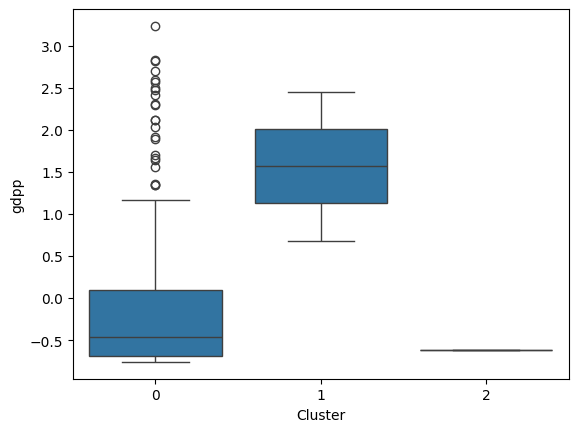

In [964]:
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(average_clustering, n_clusters=3).reshape(-1, )
df_outliers_removed["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='gdpp', data=df_outliers_removed)

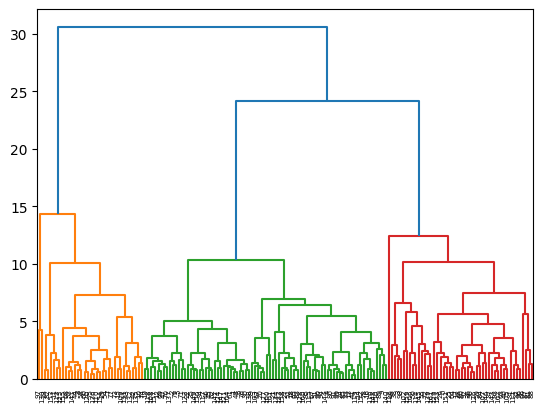

In [965]:
dendrogram(Z)
plt.show()

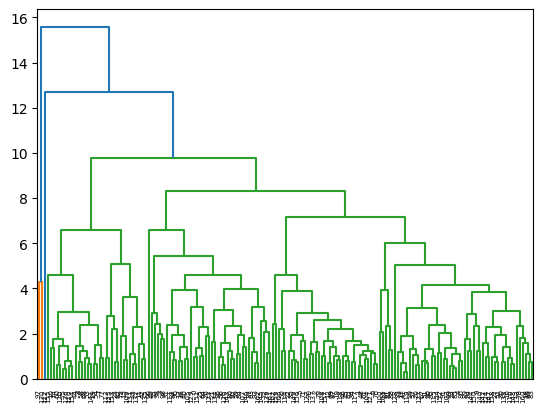

In [966]:
dendrogram(complete_clustering)
plt.show()

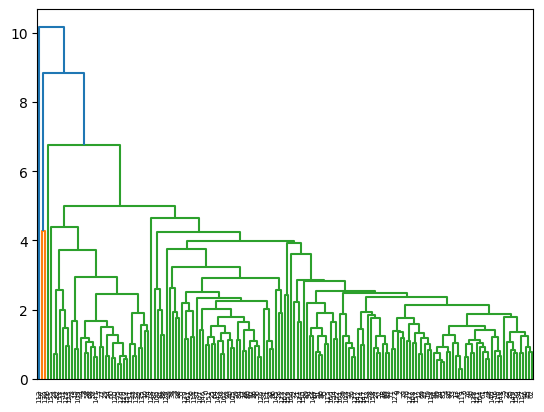

In [967]:
dendrogram(average_clustering)
plt.show()

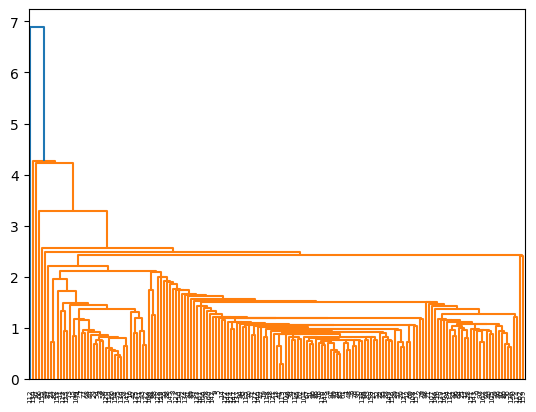

In [968]:
dendrogram(single_clustering)
plt.show()

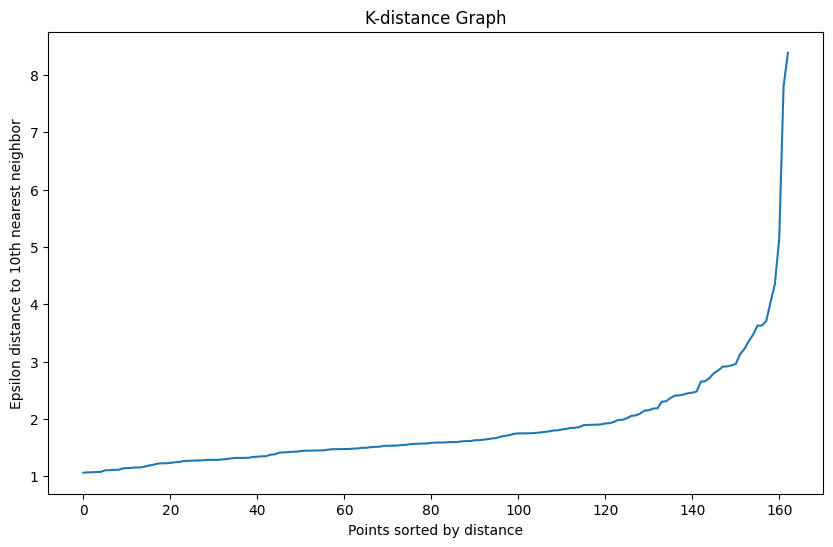

(array([-1,  0]), array([  4, 159]))


In [969]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scaled is your scaled dataset

df_dbs = df_outliers_removed.drop(['Cluster'], axis=1) # Remove 'Cluster' if it exists

# Estimating eps using the k-distance plot
neighbors = NearestNeighbors(n_neighbors=11).fit(df_dbs)  # k = dimensionality + 1
distances, indices = neighbors.kneighbors(df_dbs)
distance_dec = sorted(distances[:, 10])  # using 10th nearest neighbor distance

plt.figure(figsize=(10, 6))
plt.plot(distance_dec)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance to 10th nearest neighbor')
plt.show()

# DBSCAN after selecting eps and min_samples based on the plot
eps_value = 3# This should be derived from your k-distance plot observation
min_samples_value = 10  # As a starting point, often set to k
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(df_dbs)

# Count cluster labels to evaluate the clustering
print(np.unique(clusters, return_counts=True))


This is horrible as the dimensionality is really high and the 

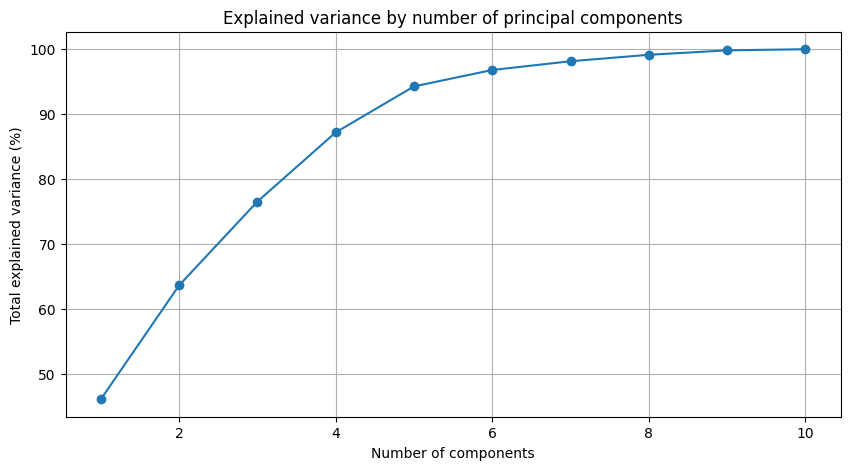

In [970]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA




explained_variances = []
components = list(range(1, len(df_outliers_removed.columns) + 1))

for i in components:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(df_outliers_removed)
    total_var = pca.explained_variance_ratio_.sum() * 100
    explained_variances.append(total_var)

plt.figure(figsize=(10, 5))
plt.plot(components, explained_variances, marker='o')
plt.title('Explained variance by number of principal components')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance (%)')
plt.grid(True)
plt.show()

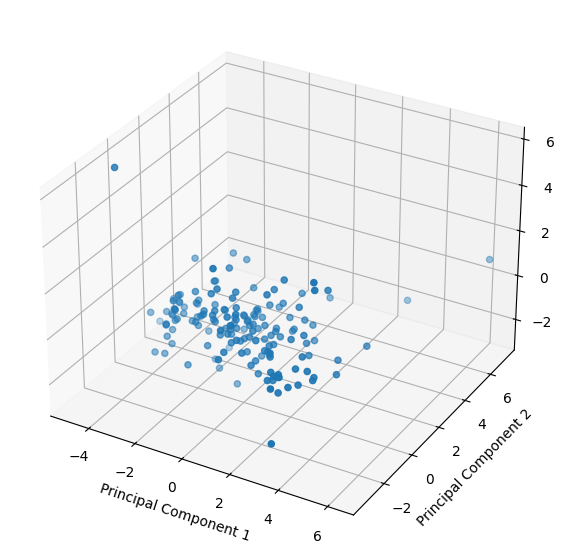

In [971]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_outliers_removed)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df_pca[:, 0]
y = df_pca[:, 1]
z = df_pca[:, 2]

ax.scatter(x, y, z)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()





We chose 3 cause it's easier to visualize 

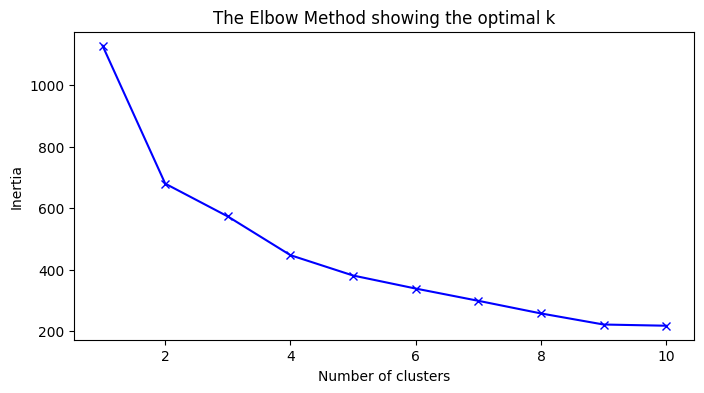

In [972]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate distortions for a range of number of clusters
distortions = []
K = range(1, 11)  # Typically, we check the elbow for 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    distortions.append(kmeans.inertia_)

# Plotting the distortions to find the elbow
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


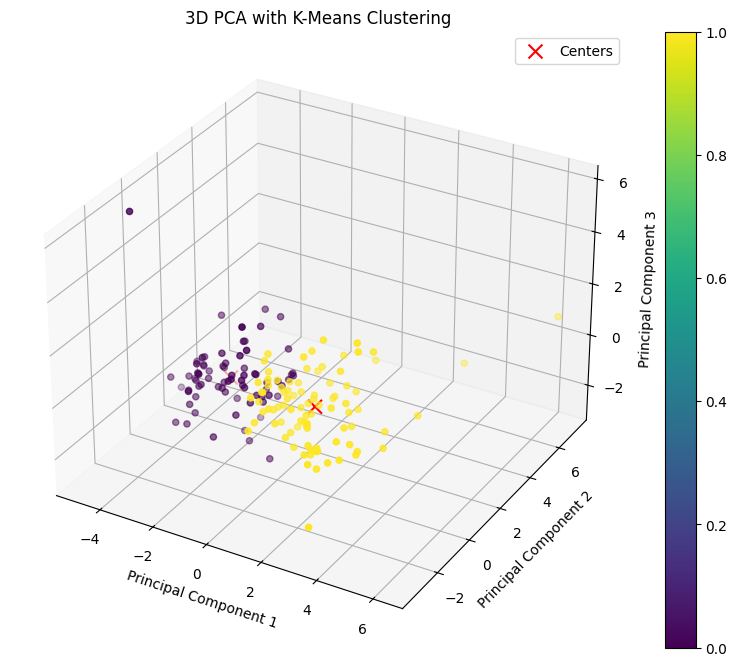

[[-1.81031398  0.16471594 -0.04366136]
 [ 1.50520488 -0.13695483  0.03630271]]


In [973]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Assuming df_pca is your 3D PCA-reduced data and k_opt is the number of clusters
k_opt = 2
kmeans = KMeans(n_clusters=k_opt, random_state=0)
clusters = kmeans.fit_predict(df_pca)
# Add cluster labels to the original dataframe
df_outliers_removed['Cluster'] = clusters


# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, cmap='viridis')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=100, c='red', marker='x', label='Centers')

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter)
plt.title('3D PCA with K-Means Clustering')
plt.legend()

plt.show()
print(centers)

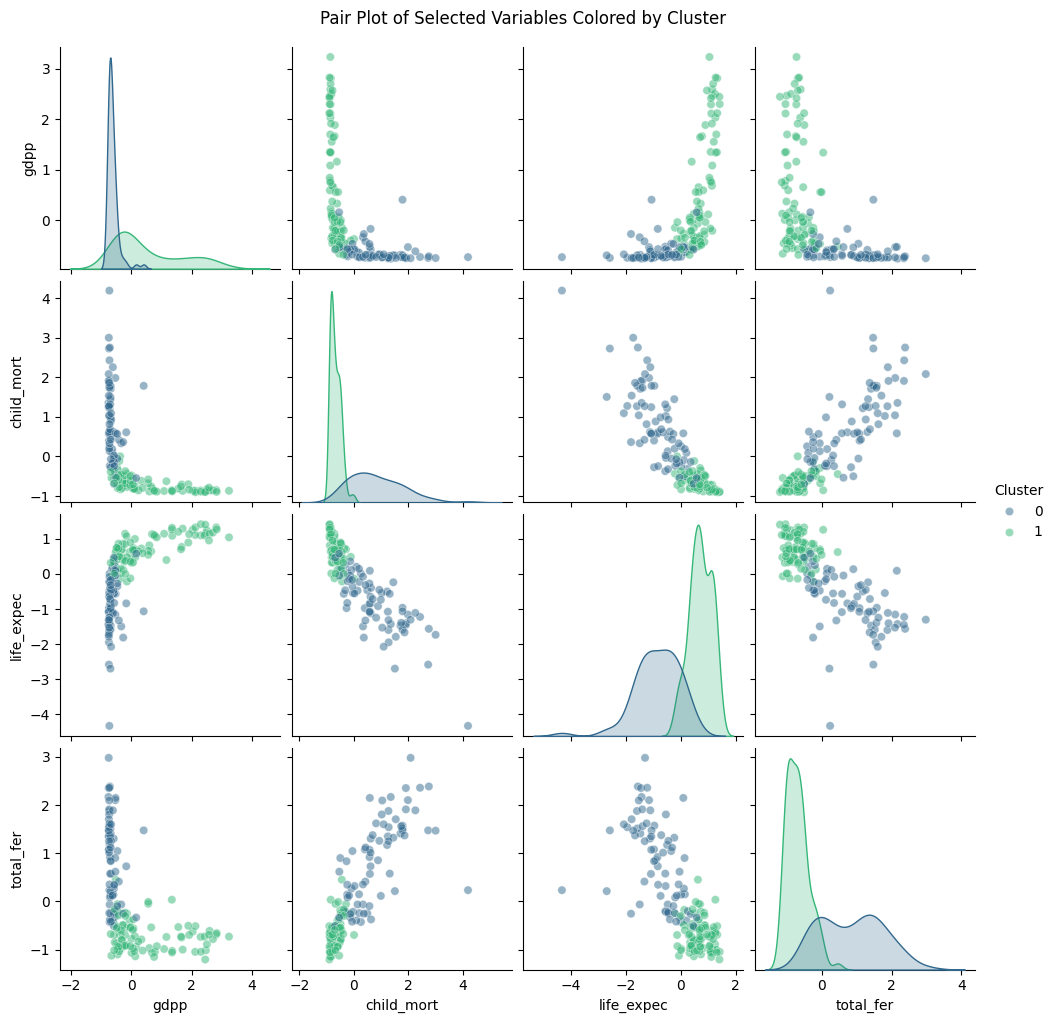

In [974]:
# Select specific columns for the pair plot
selected_columns = df_outliers_removed[['gdpp', 'child_mort', 'life_expec', 'total_fer', 'Cluster']]

# Create a pair plot colored by cluster membership
pairplot = sns.pairplot(selected_columns, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.5})
pairplot.fig.suptitle('Pair Plot of Selected Variables Colored by Cluster', y=1.02)  # Adjust the title position
plt.show()

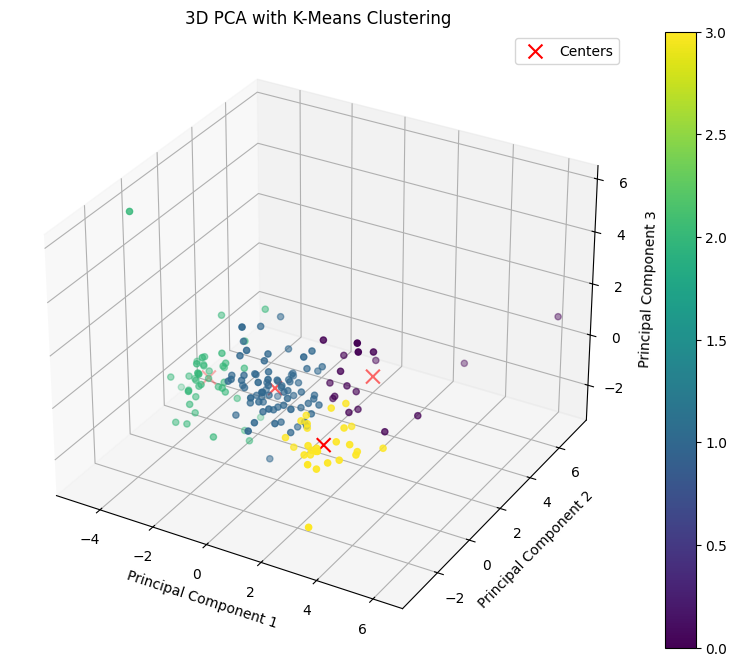

[[ 2.51190481  1.71342296  0.45678751]
 [-0.02906474 -0.0387303   0.21361725]
 [-2.62286911  0.12493874 -0.2677849 ]
 [ 2.48722727 -1.22761251 -0.48926373]]


In [975]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Assuming df_pca is your 3D PCA-reduced data and k_opt is the number of clusters
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=0)
clusters = kmeans.fit_predict(df_pca)
df_outliers_removed['Cluster'] = clusters

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, cmap='viridis')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=100, c='red', marker='x', label='Centers')

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter)
plt.title('3D PCA with K-Means Clustering')
plt.legend()

plt.show()
print(centers)

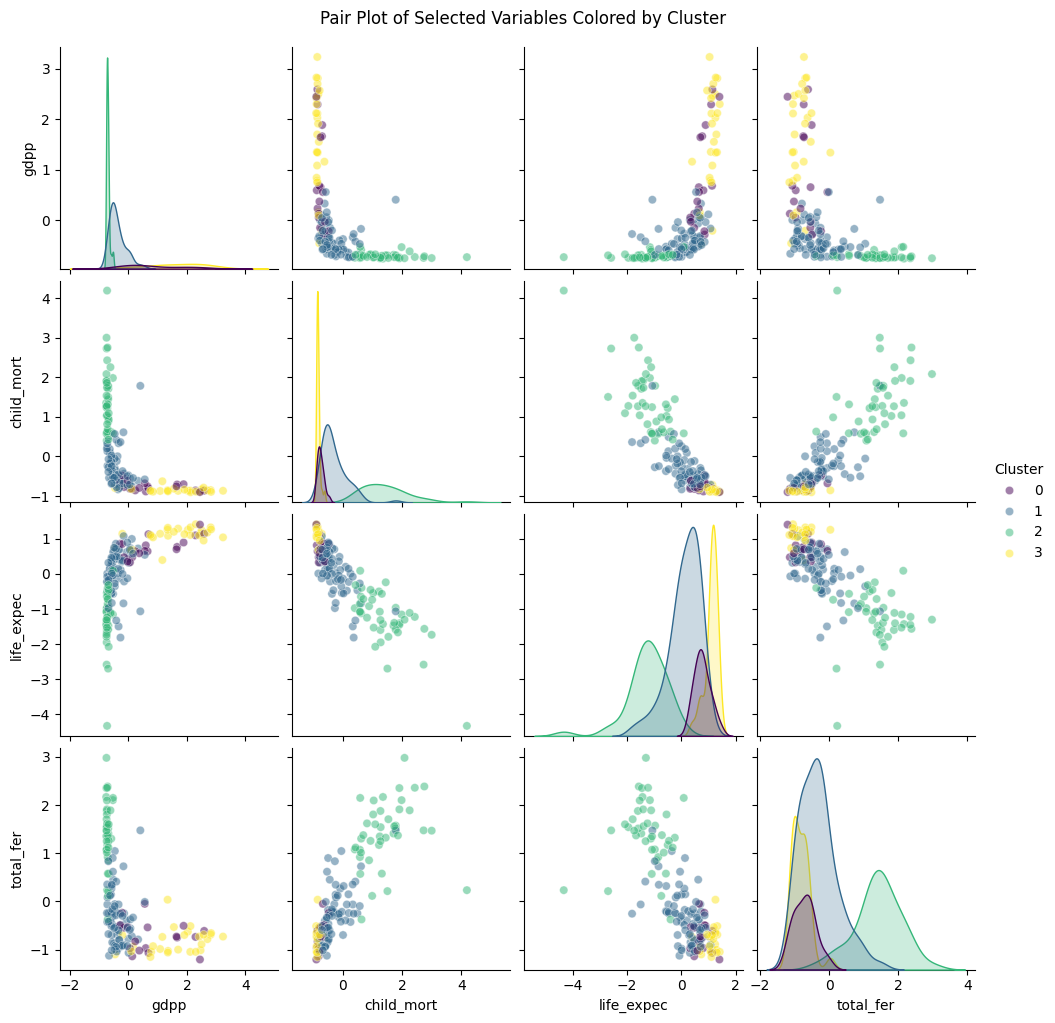

In [976]:
# Select specific columns for the pair plot
selected_columns = df_outliers_removed[['gdpp', 'child_mort', 'life_expec', 'total_fer', 'Cluster']]

# Create a pair plot colored by cluster membership
pairplot = sns.pairplot(selected_columns, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.5})
pairplot.fig.suptitle('Pair Plot of Selected Variables Colored by Cluster', y=1.02)  # Adjust the title position
plt.show()

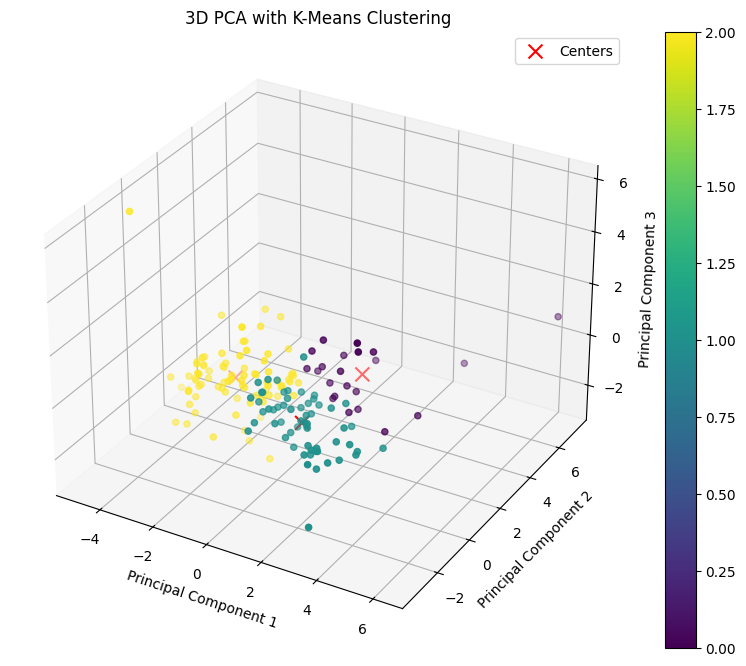

[[ 2.19532804  1.59277075  0.51266256]
 [ 1.45045069 -0.82014624 -0.20886743]
 [-1.63260741  0.16277648  0.01273905]]


In [977]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Assuming df_pca is your 3D PCA-reduced data and k_opt is the number of clusters
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=0)
clusters = kmeans.fit_predict(df_pca)
df_outliers_removed['Cluster'] = clusters

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, cmap='viridis')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=100, c='red', marker='x', label='Centers')

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter)
plt.title('3D PCA with K-Means Clustering')
plt.legend()

plt.show()
print(centers)

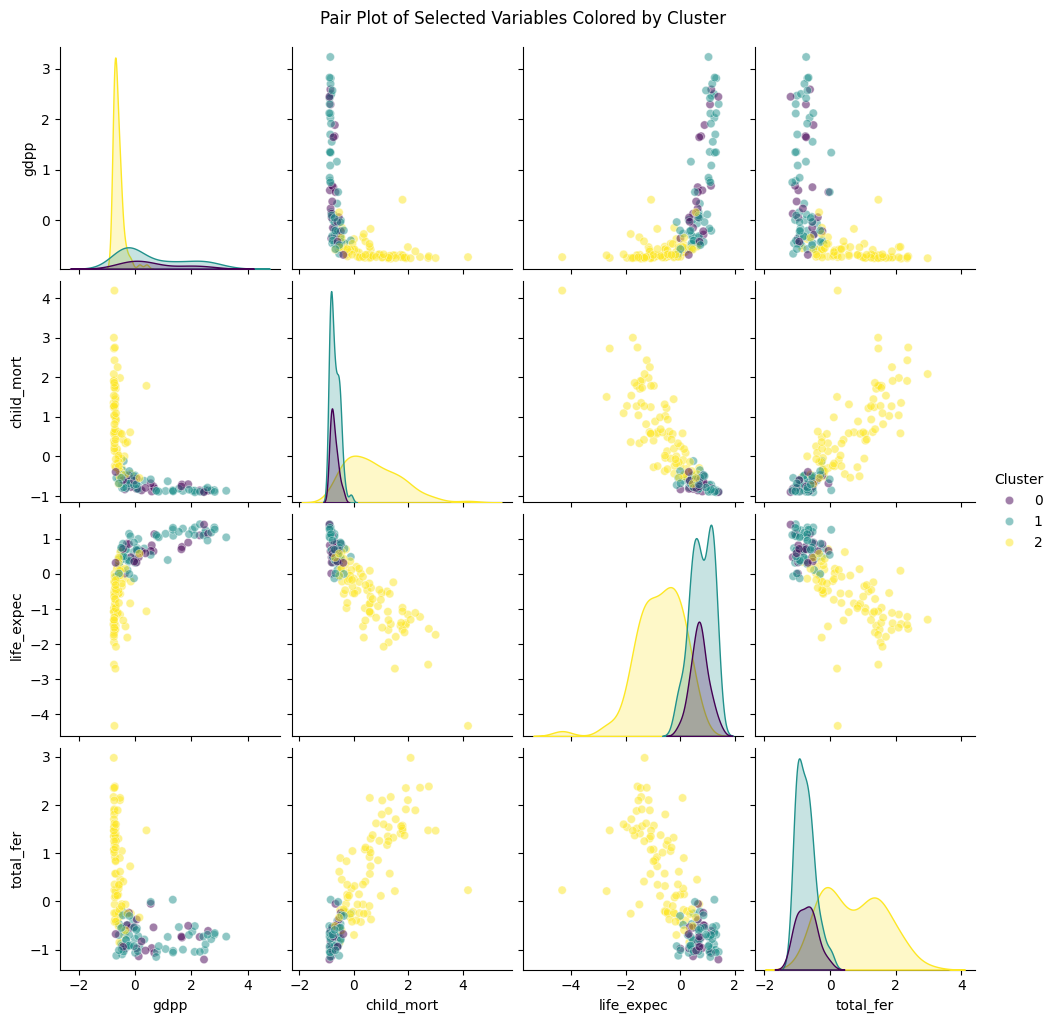

In [978]:
# Select specific columns for the pair plot
selected_columns = df_outliers_removed[['gdpp', 'child_mort', 'life_expec', 'total_fer', 'Cluster']]

# Create a pair plot colored by cluster membership
pairplot = sns.pairplot(selected_columns, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.5})
pairplot.fig.suptitle('Pair Plot of Selected Variables Colored by Cluster', y=1.02)  # Adjust the title position
plt.show()

In [979]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(df_pca, method="complete", metric="euclidean")
average_clustering = linkage(df_pca, method="average", metric="euclidean")
single_clustering = linkage(df_pca, method="single", metric="euclidean")
Z = linkage(df_pca, 'ward', metric= 'euclidean')

<Axes: xlabel='Cluster', ylabel='gdpp'>

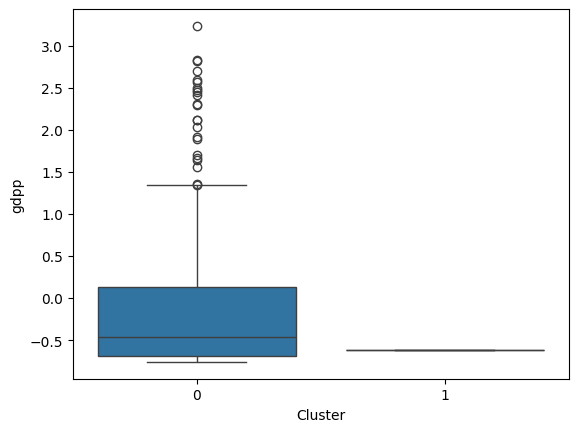

In [980]:
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
df_outliers_removed["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='gdpp', data=df_outliers_removed)

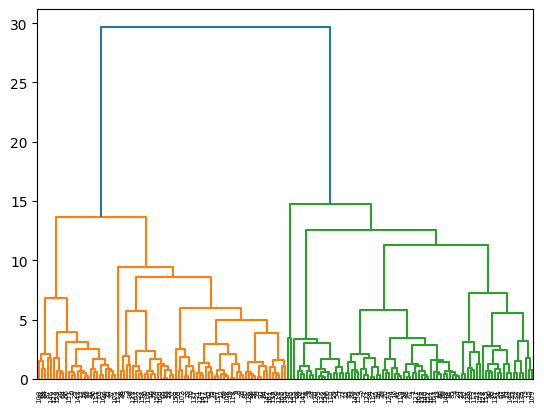

In [981]:
dendrogram(Z)
plt.show()

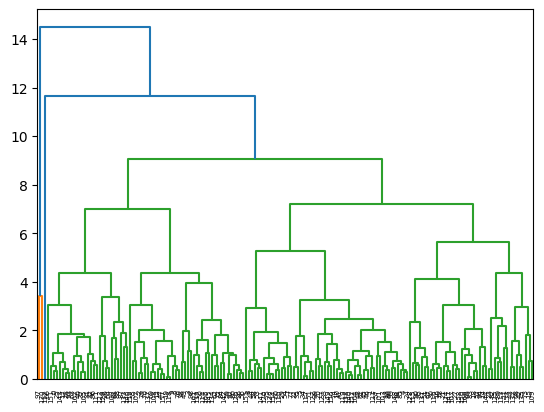

In [982]:
dendrogram(complete_clustering)
plt.show()

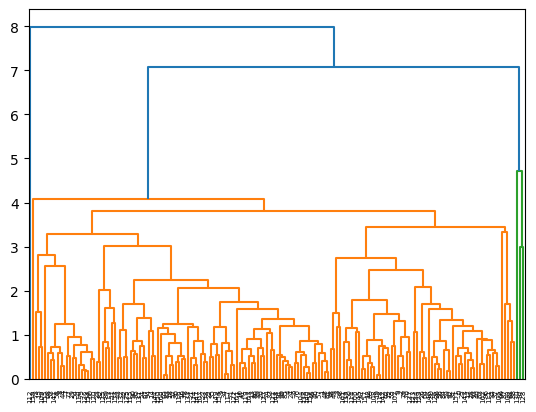

In [983]:
dendrogram(average_clustering)
plt.show()

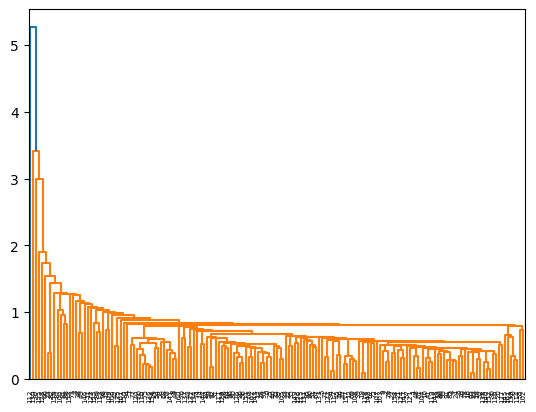

In [984]:
dendrogram(single_clustering)
plt.show()

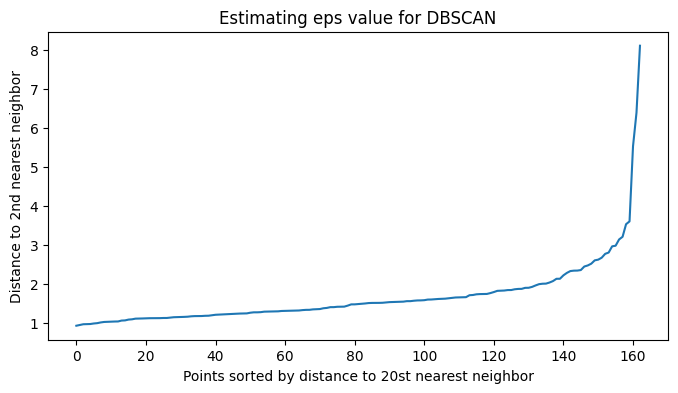

In [997]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_pca is your PCA-reduced DataFrame
neighbors = NearestNeighbors(n_neighbors=21)  # Using the second nearest neighbor
nbrs = neighbors.fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

# Sort the distances
sorted_distances = np.sort(distances[:, 20], axis=0)
plt.figure(figsize=(8, 4))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to 20st nearest neighbor')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('Estimating eps value for DBSCAN')
plt.show()


In [994]:
from sklearn.cluster import DBSCAN

# Use the NearestNeighbors to estimate eps, as previously explained
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=2)
nbrs = neighbors.fit(df_outliers_removed.drop('Cluster', axis=1))
distances, indices = nbrs.kneighbors(df_outliers_removed.drop('Cluster', axis=1))

sorted_distances = np.sort(distances[:, 1])
eps_value = sorted_distances[int(len(sorted_distances) * 0.90)]  # 90th percentile as example

dbscan = DBSCAN(eps=eps_value, min_samples=5)  # Adjust these parameters as needed
clusters = dbscan.fit_predict(df_outliers_removed.drop('Cluster', axis=1))


In [996]:
clusters

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0])

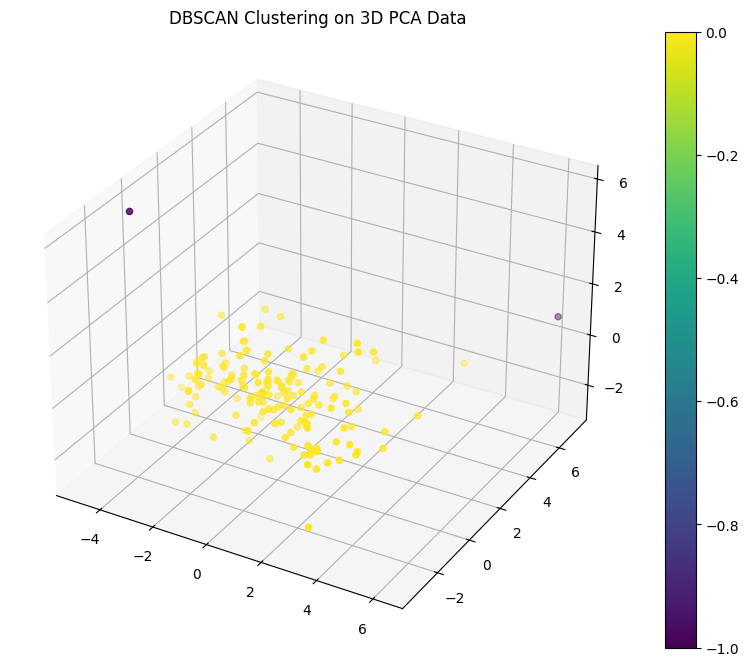

Unique clusters (including noise): [-1  0]


In [986]:
from sklearn.cluster import DBSCAN

# Estimate eps from the plot, where there is a sharp bend in the sorted distances
eps_value = 5 # This is an example value; adjust based on your plot
min_samples_value = 20  # Example value; adjust as necessary

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(df_pca)

# Visualizing the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering on 3D PCA Data')
plt.colorbar(scatter)
plt.show()

# Analyzing the results
unique_clusters = np.unique(clusters)
print(f'Unique clusters (including noise): {unique_clusters}')


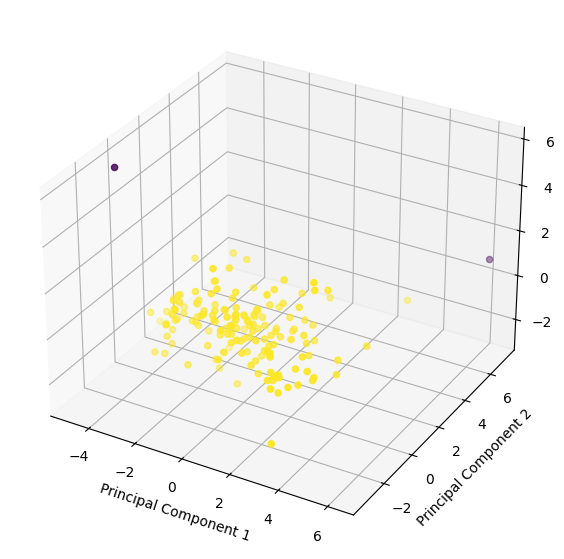

In [987]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df_pca[:, 0]
y = df_pca[:, 1]
z = df_pca[:, 2]
ax.scatter(x,y,z, c=clusters, cmap='viridis', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [988]:
from sklearn.cluster import DBSCAN

# Use the NearestNeighbors to estimate eps, as previously explained
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=2)
nbrs = neighbors.fit(df_pca)
distances, indices = nbrs.kneighbors(df_pca)

sorted_distances = np.sort(distances[:, 1])
eps_value = sorted_distances[int(len(sorted_distances) * 0.90)]  # 90th percentile as example

dbscan = DBSCAN(eps=eps_value, min_samples=5)  # Adjust these parameters as needed
clusters = dbscan.fit_predict(df_pca)


In [989]:
clusters

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1,  0,
       -1,  0,  0,  0,  1,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0, -1,  0,  0,  0])

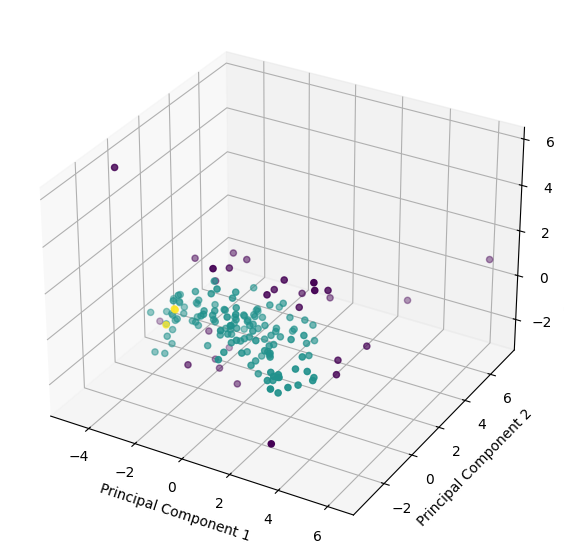

In [990]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df_pca[:, 0]
y = df_pca[:, 1]
z = df_pca[:, 2]
ax.scatter(x,y,z, c=clusters, cmap='viridis', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [991]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



pca = PCA(n_components=2)  # Reduce to 2 components
df_pca_2d = pca.fit_transform(df_outliers_removed)  # Apply PCA




In [992]:
from sklearn.cluster import DBSCAN

# Use the NearestNeighbors to estimate eps, as previously explained
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=2)
nbrs = neighbors.fit(df_pca_2d)
distances, indices = nbrs.kneighbors(df_pca_2d)

sorted_distances = np.sort(distances[:, 1])
eps_value = sorted_distances[int(len(sorted_distances) * 0.90)]  # 90th percentile as example

dbscan = DBSCAN(eps=eps_value, min_samples=5)  # Adjust these parameters as needed
clusters = dbscan.fit_predict(df_pca_2d)


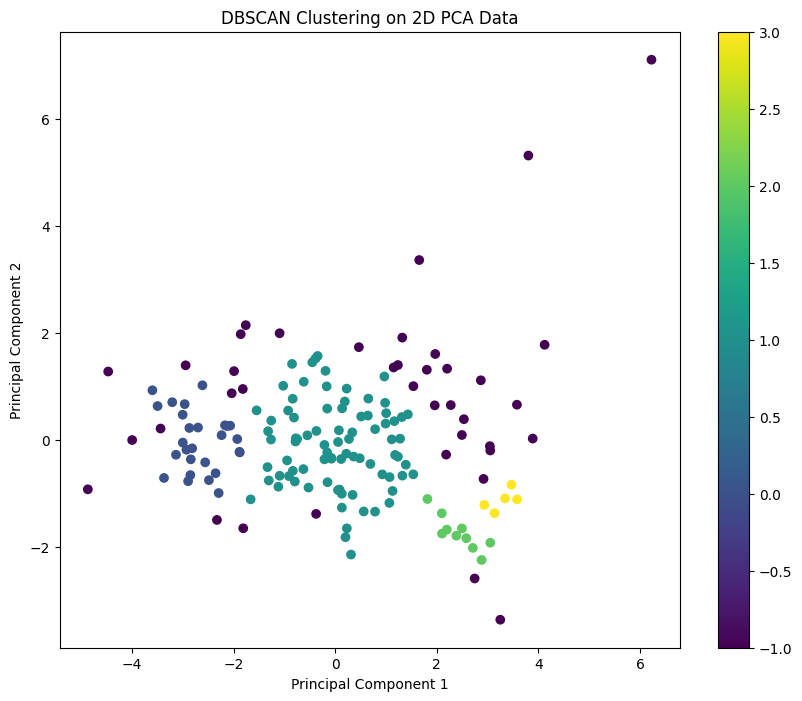

In [993]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=clusters, cmap='viridis', marker='o')
plt.colorbar()  # Show color scale
plt.title('DBSCAN Clustering on 2D PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
